In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Real m and c values = 2, -1
--------------------------------------------------
Calculated m and c values =  [2.11541439 1.27744231]


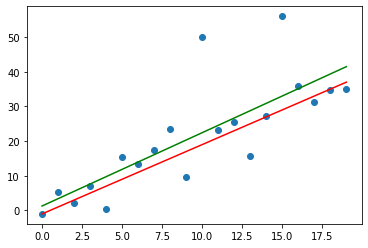

In [2]:
"""
Least square error fitting minimizing VERTICAL DISTANCE.
"""
x = np.arange(20)
m = 2; c = -1
print("Real m and c values = {}, {}".format(m,c))
y_true = m*x + c # real values
plt.plot(x,y_true, color='r')

print("-"*50)
y = y_true + np.random.normal(0,5,len(x)) # random values
y[10] = 50; y[15] = 56 #  Effect of outlier
plt.scatter(x,y)

# finding unknowns using linear algebra direct method
Y = y.T
X = np.concatenate((x.reshape(len(x),1), np.ones((x.shape[0],1))), axis=1)
B = np.linalg.inv(X.T@X)@X.T@Y
print("Calculated m and c values = ",B)
plt.plot(x, X.dot(B), color='g')
plt.show()

Real a and b values = 0.5, 0.8660254037844386
Real d =  4
--------------------------------------------------
Calculated a and b values =  [0.60066668 0.79949956]
Constraint: a^2 + b^2 = 1 -> 0.9999999999999998
Calculated d =  4.461833746303036


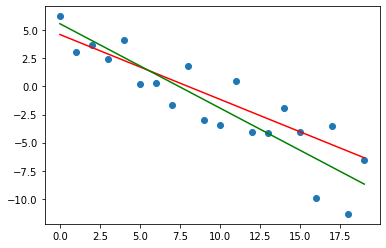

In [3]:
"""
Least square error fitting minimizing PERPENDICULAR DISTANCE.
"""

# constraints = a^2 + b^2 =1
a = 0.5
b = np.sqrt(1-a**2)
print("Real a and b values = {}, {}".format(a,b) )
d = 4
print("Real d = ", d)

x = np.arange(20)
y_true = (1/b)*(d- a*x)  # real values ax +by - d =0
plt.plot(x,y_true, color='r')


y = y_true + np.random.normal(0,2,len(x)) # random values
#y[10] = 10; y[15] = 16 #  Effect of outlier
plt.scatter(x,y)

print("-"*50)
# finding unknowns using linear algebra direct method

x_bar = np.mean(x)
y_bar = np.mean(y)

# A = np.concatenate((x.reshape(len(x),1),y.reshape(len(y),1)), axis=1)
# print(A)

A = np.concatenate((x.reshape(len(x),1),y.reshape(len(y),1)), axis=1) -np.array([x_bar,y_bar])
#print(A)

# Singular Value decomposition of A
U, D, VT = np.linalg.svd(A.T.dot(A))
# unit singular vector corresponding to the smallest 
# singular value, is the solution N. That is last column of V.
# i.e. Last row of the V^T
N =   VT[-1]
print("Calculated a and b values = ", N)

#calculated a and b through sigular value decomposition
a_calc, b_calc = N
print("Constraint: a^2 + b^2 = 1 ->", a_calc**2+ b_calc**2)
d = a_calc*x_bar + b_calc*y_bar
print("Calculated d = ",d)

y_calc = (1/b_calc)*(d- a_calc*x)
plt.plot(x,y_calc, color='g')
plt.show()

Calculated m and c values =  [0.40500789 2.39647895]


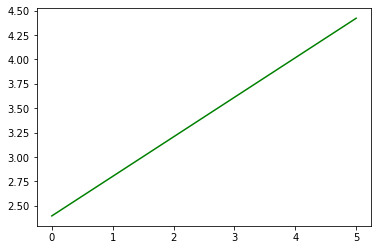

In [5]:
x = np.array([0,3,5])
y = np.array([2.5500,3.2277,4.6518])
Y = y.T
X = np.concatenate((x.reshape(len(x),1), np.ones((x.shape[0],1))), axis=1)
B = np.linalg.inv(X.T@X)@X.T@Y
print("Calculated m and c values = ",B)
plt.plot(x, X.dot(B), color='g')
plt.show()

Calculated a and b values =  [ 0.90156679 -0.43263994]
Constraint: a^2 + b^2 = 1 -> 0.9999999999999998
Calculated d =  -0.5361678497614348


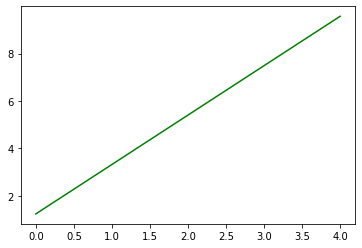

In [4]:
x = np.array([0,1,2,3,4])
y = np.array([3.7183,4.0196,6.9012,8.3961,4])
x_bar = np.mean(x)
y_bar = np.mean(y)

# A = np.concatenate((x.reshape(len(x),1),y.reshape(len(y),1)), axis=1)
# print(A)

A = np.concatenate((x.reshape(len(x),1),y.reshape(len(y),1)), axis=1) -np.array([x_bar,y_bar])
#print(A)

# Singular Value decomposition of A
U, D, VT = np.linalg.svd(A.T.dot(A))
# unit singular vector corresponding to the smallest 
# singular value, is the solution N. That is last column of V.
# i.e. Last row of the V^T
N =   VT[-1]
print("Calculated a and b values = ", N)

#calculated a and b through sigular value decomposition
a_calc, b_calc = N
print("Constraint: a^2 + b^2 = 1 ->", a_calc**2+ b_calc**2)
d = a_calc*x_bar + b_calc*y_bar
print("Calculated d = ",d)

y_calc = (1/b_calc)*(d- a_calc*x)
plt.plot(x,y_calc, color='g')
plt.show()